<h1> Objective:- Assessment Task 8.1P: Speech emotion recognition using MFCC features </h1>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>
<div style="text-align: right"> StudentId: <b> 221047083 </b></div>

### 1. MFCC

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo
import os
import numpy as np
import librosa
from pydub import AudioSegment
from pydub.utils import mediainfo
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
speech = AudioSegment.from_wav('/Users/karanmurjani/Downloads/Study/Trimester 2 - SY/Computer Vision & NLP/Resources_7.1/arctic_a0005.wav') #Read audio data from file

x = speech.get_array_of_samples() #samples x(t)
x_sr = speech.frame_rate  #sampling rate f - see slide 24 in week 7 lecture slides

mfcc = librosa.feature.mfcc(
    y = np.float32(x),
    sr = x_sr, #sampling rate of the signal, which is determined from the signal
    hop_length = int(x_sr * 0.015), #15 ms
    n_mfcc = 12 #number of mfcc features
)
print(mfcc.shape)

(12, 95)


Text(0, 0.5, 'Amplitude')

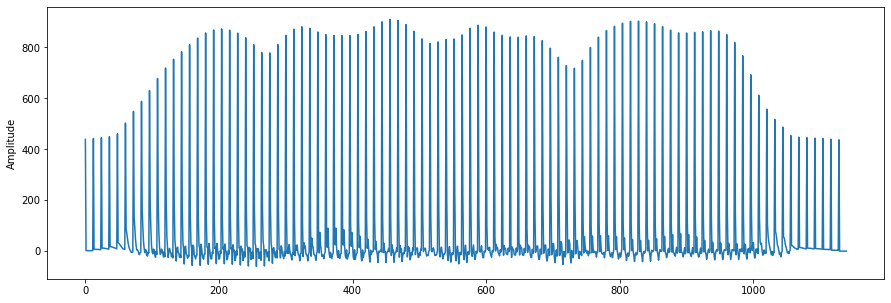

In [14]:
mfcc_flattened = np.reshape(mfcc.T, (mfcc.shape[0] * mfcc.shape[1]))
plt.figure(figsize = (15, 5))
plt.plot(mfcc_flattened)
plt.ylabel('Amplitude')

### 2. Speech emotion recognition

In [15]:
emotions = ['Calm', 'Happy', 'Sad', 'Angry']
path = 'EmotionSpeech/'
training_file_names = []
training_emotion_labels = []
for i in range(0, len(emotions)):
    sub_path = path + 'Train/' + emotions[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_emotion_labels = [i] * len(sub_file_names)
    training_file_names += sub_file_names
    training_emotion_labels += sub_emotion_labels

In [16]:
def mfcc_extraction(audio_filename, #.wav filename
                    hop_duration, #hop_length in seconds, e.g., 0.015s (i.e., 15ms)
                    num_mfcc, #number of mfcc features
                    num_frames #number of frames
                   ):
    speech = AudioSegment.from_wav(audio_filename)  #Read audio data from file
    samples = speech.get_array_of_samples()  #samples x(t)
    sampling_rate = speech.frame_rate  #sampling rate f - see slide 24 in week 7 lecture slides
    
    mfcc = librosa.feature.mfcc(
        y = np.float32(samples),
        sr = sampling_rate,
        hop_length = int(sampling_rate * hop_duration),
        n_mfcc = num_mfcc)
    mfcc_truncated = np.zeros((num_mfcc, num_frames), np.float32)
    
    for i in range(min(num_frames, mfcc.shape[1])):
        mfcc_truncated[:, i] = mfcc[:, i]
    
    #output is a vector including mfcc_truncated.shape[0] * mfcc_truncated.shape[1] elements
    return np.reshape(mfcc_truncated.T, mfcc_truncated.shape[0] * mfcc_truncated.shape[1])

### 1. Given the mfcc_extraction method, extract MFCC features from the training audio clips. Suppose that, in this task, each clip is sampled at 200 frames (i.e., num_frames=200), the hop length between two consecutive frames is 15ms, and 12 MFCC features are extracted on each frame. Hint: You can use a list to store MFCC feature vectors, each element in the list is an array of MFCC features returned by the mfcc_extraction method.

In [31]:
hop_duration = 0.015
num_mfcc = 12
num_frames = 200

emotions = ['Calm', 'Happy', 'Sad', 'Angry']
path = 'EmotionSpeech/'

training_file_names = []
training_emotion_labels = []
for i in range(0, len(emotions)):
    sub_path = path + 'Train/' + emotions[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_emotion_labels = [i] * len(sub_file_names)
    training_file_names += sub_file_names
    training_emotion_labels += sub_emotion_labels
    
testing_file_names = []
testing_emotion_labels = []
for i in range(0, len(emotions)):
    sub_path = path + 'Test/' + emotions[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_emotion_labels = [i] * len(sub_file_names)
    testing_file_names += sub_file_names
    testing_emotion_labels += sub_emotion_labels
    
training_mfcc = []
for filename in training_file_names:
    training_mfcc.append(mfcc_extraction(filename, hop_duration, num_mfcc, num_frames))

testing_mfcc = []
for filename in testing_file_names:
    testing_mfcc.append(mfcc_extraction(filename, hop_duration, num_mfcc, num_frames))
    
#Fitting SVM Algorithm
svm_classifier = svm.SVC(C = 100, kernel = 'linear')
svm_classifier.fit(training_mfcc, training_emotion_labels)
#Predicting the emotions
predicted_emotions_labels = svm_classifier.predict(testing_mfcc)

#Calculating the Accuracy
correct_perdiction = np.sum(predicted_emotions_labels == testing_emotion_labels)
acc = correct_perdiction / len(testing_emotion_labels)
print('The accuracy of the SVM algorithm is: ', acc)

#Calculating the Confusion Matrix
cm = confusion_matrix(testing_emotion_labels, predicted_emotions_labels)
print('SVM Confusion Matrix', cm)

print('SVM Model class wise accuracy')
print(cm.diagonal() / cm.sum(axis = 1))


#Fitting the Adaboost Algorithm
adb_classifier = AdaBoostClassifier(n_estimators = 150, random_state = 0)
adb_classifier.fit(training_mfcc, training_emotion_labels)
#Predicting the emotions
predicted_emotions_labels = adb_classifier.predict(testing_mfcc)

#Calculating the Accuracy
correct_perdiction = np.sum(predicted_emotions_labels == testing_emotion_labels)
acc = correct_perdiction / len(testing_emotion_labels)
print('The accuracy of the AdaBoost algorithm is: ', acc)

#Calculating the Confusion Matrix
cm = confusion_matrix(testing_emotion_labels, predicted_emotions_labels)
print('AdaBoost Confusion Matrix', cm)

print('AdaBoost Model class wise accuracy')
print(cm.diagonal() / cm.sum(axis = 1))

The accuracy of the SVM algorithm is:  0.6328125
SVM Confusion Matrix [[29  0  3  0]
 [ 4 12 14  2]
 [ 8  0 22  2]
 [ 4  7  3 18]]
SVM Model class wise accuracy
[0.90625 0.375   0.6875  0.5625 ]
The accuracy of the AdaBoost algorithm is:  0.4609375
AdaBoost Confusion Matrix [[24  1  7  0]
 [ 2  5 13 12]
 [16  2 11  3]
 [ 0  5  8 19]]
AdaBoost Model class wise accuracy
[0.75    0.15625 0.34375 0.59375]


### 2. Speech emotion recognition using SVM (revisit Task 4.1 for examples of SVMs)

#### a. Define a linear SVM model. You are free to set the parameter C for your SVM model.

#### b. Train your SVM model with the speech data supplied in the Train folder.

#### c. Use the trained SVM model to recognise emotions from the speech data supplied in the Test folder. Report the overall recognition accuracy, the recognition accuracy on each emotion, and confusion matrix of your SVM model.

#### d. Vary num_mfcc in the range [12, 14, 16, 18, 20, 22, 24, 26, 28, 30] and report the corresponding overall recognition accuracies.

In [20]:
num_mfcc_array = [12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
svmAccuracyDict = {};

for i in num_mfcc_array:
    training_mfcc = []
    for filename in training_file_names:
        training_mfcc.append(mfcc_extraction(filename, hop_duration, i, num_frames))

    testing_mfcc = []
    for filename in testing_file_names:
        testing_mfcc.append(mfcc_extraction(filename, hop_duration, i, num_frames))
    
    #Fitting SVM Algorithm
    svm_classifier = svm.SVC(C = 10, kernel = 'linear')
    svm_classifier.fit(training_mfcc, training_emotion_labels)
    #Predicting the emotions
    predicted_emotions_labels = svm_classifier.predict(testing_mfcc)

    #Calculating the Accuracy
    correct_perdiction = np.sum(predicted_emotions_labels == testing_emotion_labels)
    acc = correct_perdiction / len(testing_emotion_labels)
    svmAccuracyDict[i] = acc

In [21]:
for i, j in svmAccuracyDict.items():
    print("The accuracy of the SVM algorithm when num_mfcc = %d is: %f" % (i, j))

The accuracy of the SVM algorithm when num_mfcc = 12 is: 0.632812
The accuracy of the SVM algorithm when num_mfcc = 14 is: 0.632812
The accuracy of the SVM algorithm when num_mfcc = 16 is: 0.632812
The accuracy of the SVM algorithm when num_mfcc = 18 is: 0.632812
The accuracy of the SVM algorithm when num_mfcc = 20 is: 0.648438
The accuracy of the SVM algorithm when num_mfcc = 22 is: 0.640625
The accuracy of the SVM algorithm when num_mfcc = 24 is: 0.640625
The accuracy of the SVM algorithm when num_mfcc = 26 is: 0.625000
The accuracy of the SVM algorithm when num_mfcc = 28 is: 0.625000
The accuracy of the SVM algorithm when num_mfcc = 30 is: 0.625000


### 3. Speech emotion recognitioin using AdaBoost (revisit Task 4.1 for examples of AdaBoost)

#### a. Define an AdaBoost model. You are free to set the number of estimators for your AdaBoost model.
#### b. Train your AdaBoost model with the speech data supplied in the Train folder.
#### c. Use the trained AdaBoost model to recognise emotions from the speech data supplied in the Test folder. Report the overall recognition accuracy, the recognition accuracy on each emotion, and confusion matrix of your AdaBoost model.
#### d. Vary num_mfcc in the range [12, 14, 16, 18, 20, 22, 24, 26, 28, 30] and report the corresponding overall recognition accuracies.


In [26]:
adaBoostAccuracyDict = {}

for i in num_mfcc_array:
    training_mfcc = []
    for filename in training_file_names:
        training_mfcc.append(mfcc_extraction(filename, hop_duration, i, num_frames))

    testing_mfcc = []
    for filename in testing_file_names:
        testing_mfcc.append(mfcc_extraction(filename, hop_duration, i, num_frames))
    
    #Fitting the Adaboost Algorithm
    adb_classifier = AdaBoostClassifier(n_estimators = 150, random_state = 0)
    adb_classifier.fit(training_mfcc, training_emotion_labels)
    #Predicting the emotions
    predicted_emotions_labels = adb_classifier.predict(testing_mfcc)

    #Calculating the Accuracy
    correct_perdiction = np.sum(predicted_emotions_labels == testing_emotion_labels)
    acc = correct_perdiction / len(testing_emotion_labels)
    adaBoostAccuracyDict[i] = acc

In [27]:
for i, j in adaBoostAccuracyDict.items():
    print("The accuracy of the AdaBoost algorithm when num_mfcc = %d is: %f" % (i, j))

The accuracy of the AdaBoost algorithm when num_mfcc = 12 is: 0.460938
The accuracy of the AdaBoost algorithm when num_mfcc = 14 is: 0.406250
The accuracy of the AdaBoost algorithm when num_mfcc = 16 is: 0.476562
The accuracy of the AdaBoost algorithm when num_mfcc = 18 is: 0.460938
The accuracy of the AdaBoost algorithm when num_mfcc = 20 is: 0.468750
The accuracy of the AdaBoost algorithm when num_mfcc = 22 is: 0.468750
The accuracy of the AdaBoost algorithm when num_mfcc = 24 is: 0.484375
The accuracy of the AdaBoost algorithm when num_mfcc = 26 is: 0.445312
The accuracy of the AdaBoost algorithm when num_mfcc = 28 is: 0.453125
The accuracy of the AdaBoost algorithm when num_mfcc = 30 is: 0.437500
